In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

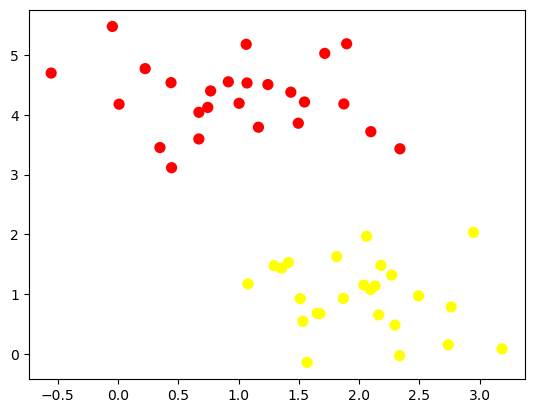

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

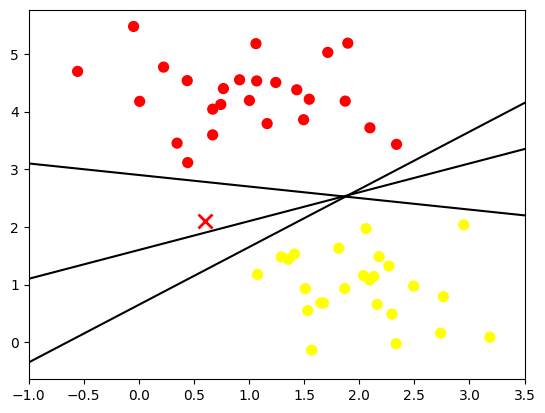

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

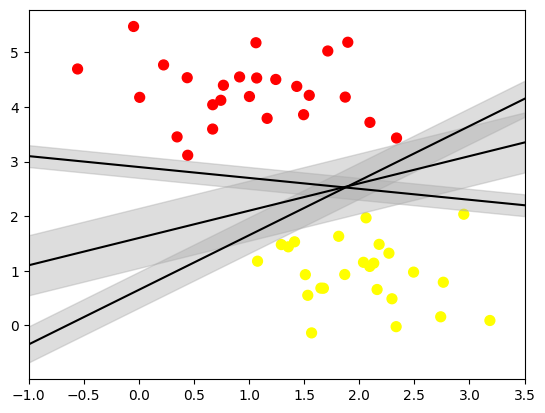

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [6]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

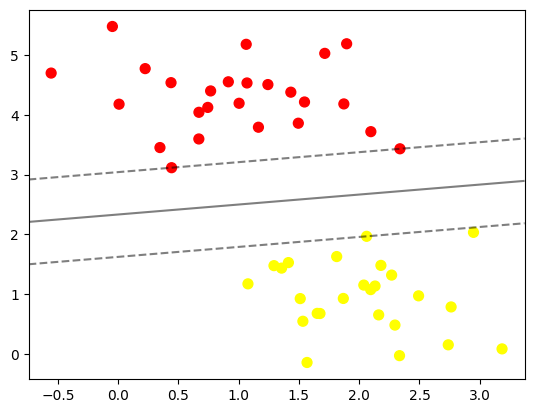

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [8]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

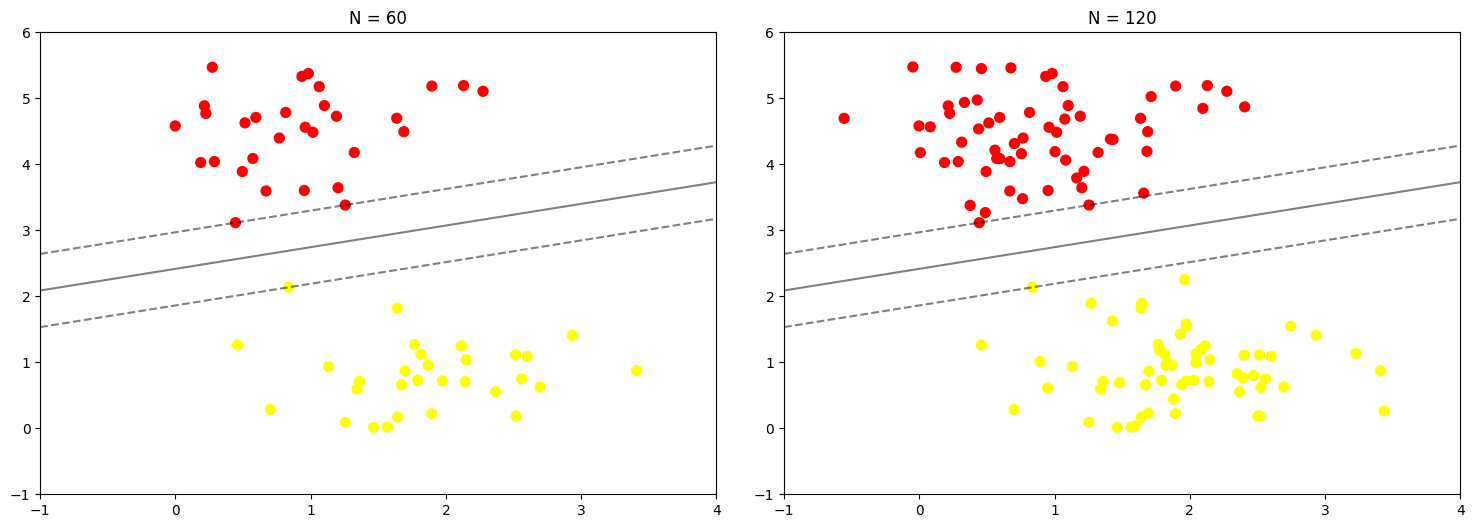

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

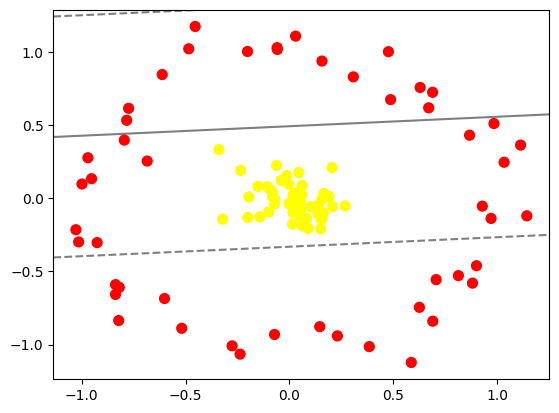

In [10]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [12]:
r = np.exp(-(X ** 2).sum(1))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.01471194, -0.17603717],
       [ 1.11217902,  0.36322167],
       [-0.96991899,  0.27661478],
       [ 0.67002227,  0.61779046],
       [-0.61241475,  0.84494216],
       [ 0.03163415, -0.0750704 ],
       [ 0.1506036 , -0.139837  ],
       [ 0.13958471, -0.04668601],
       [-0.92554571, -0.30291796],
       [ 0.81281529, -0.52873119],
       [-1.01446849, -0.29838412],
       [-0.08140872,  0.01007426],
       [ 0.5860072 , -1.12187863],
       [-0.48471135,  1.02096789],
       [ 0.30726359,  0.82925588],
       [ 0.06359276, -0.1897814 ],
       [-0.45387802,  1.17345168],
       [ 0.68952102, -0.83975593],
       [ 0.38405979, -1.01360823],
       [ 0.0436987 , -0.06352948],
       [ 0.70571107, -0.55582115],
       [-0.00284209, -0.03674399],
       [-0.04043896,  0.121918  ],
       [ 0.16514845,  0.03254796],
       [ 0.92781068, -0.05381431],
       [ 0.08874331, -0.20637607],
       [ 0.86655929,  0.43064853],
       [-0.77393628,  0.61428465],
       [ 0.68867576,  0.72385438],
       [ 0.15613144, -0.0080279 ],
       [ 0.20404268,  0.20954744],
       [ 0.62503293, -0.74508324],
       [ 0.04128814, -0.0078054 ],
       [ 0.10119478, -0.05783931],
       [-0.32201607, -0.14269578],
       [ 0.06011703,  0.08721268],
       [ 0.1624235 , -0.100586  ],
       [-0.07264337, -0.03827555],
       [-0.05933517,  1.02867004],
       [-0.05850166,  1.0164484 ],
       [ 0.23052057, -0.94045303],
       [-0.06991792, -0.00996233],
       [-1.02773309, -0.21495123],
       [-0.81894832, -0.6084421 ],
       [-0.01310748,  0.15407517],
       [-0.09961133, -0.09307008],
       [ 0.26778888, -0.05265635],
       [-0.60136719, -0.68503616],
       [ 0.62879127,  0.75665939],
       [ 0.04987049, -0.02871214],
       [ 0.01671836,  0.02481431],
       [-0.83723198, -0.6570604 ],
       [ 0.04427179,  0.17488994],
       [ 0.14962435, -0.20900895],
       [ 1.14203517, -0.12012601],
       [ 0.47601698,  1.00133612],
       [-0.20212979,  1.00271015],
       [ 0.20630693, -0.05691358],
       [-0.79498516,  0.3970547 ],
       [ 0.0262816 ,  0.01057888],
       [ 0.89984191, -0.46085487],
       [-0.9983842 ,  0.0972836 ],
       [-0.83707631, -0.58999272],
       [ 0.14576038, -0.87736072],
       [-0.7833036 ,  0.53254127],
       [-0.33963605,  0.33263096],
       [ 0.0166183 , -0.09771557],
       [ 0.05430524, -0.12523243],
       [-0.08107721,  0.03963598],
       [-0.27602182, -1.00830238],
       [ 0.05267136, -0.08523174],
       [ 0.08211233, -0.13803432],
       [-0.06294274,  0.22425588],
       [-0.20084783, -0.13147722],
       [ 0.15564471, -0.14144131],
       [-0.00308842,  0.094998  ],
       [-0.51847171, -0.8883366 ],
       [ 0.0431785 ,  0.01166957],
       [-0.23773541, -1.06494655],
       [ 0.03314008,  0.03584974],
       [ 0.88071333, -0.57987394],
       [ 0.02956091,  1.10745203],
       [-0.234995  ,  0.19052494],
       [-0.14261328, -0.12713398],
       [ 0.19016702,  0.012178  ],
       [-0.07201048, -0.93067374],
       [-0.08707974,  0.04919216],
       [ 0.96998174, -0.13801469],
       [-0.10622187,  0.07858011],
       [-0.68461815,  0.25406625],
       [-0.82174065, -0.83531137],
       [-0.19562244,  0.00834002],
       [ 0.98393986,  0.51038422],
       [ 0.13784374, -0.10651279],
       [-0.95239376,  0.13330401],
       [ 0.05898768,  0.02276844],
       [-0.15187076,  0.08112258],
       [ 0.48665449,  0.67380052],
       [ 0.15638601,  0.93720632],
       [ 1.03278392,  0.24582966]]), y=array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0]))>

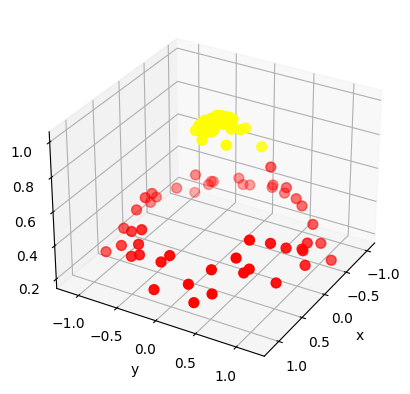

In [16]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

In [19]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

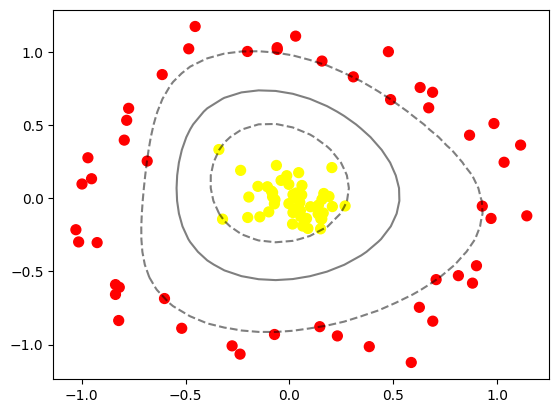

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

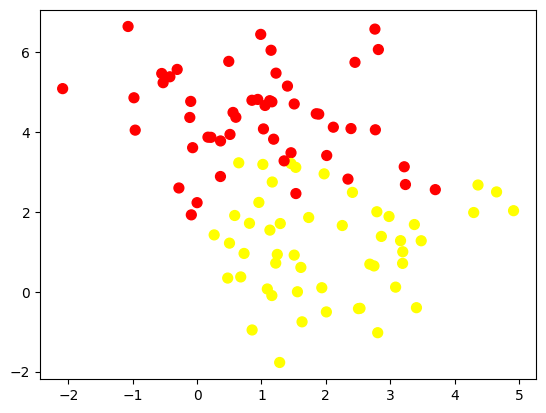

In [21]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

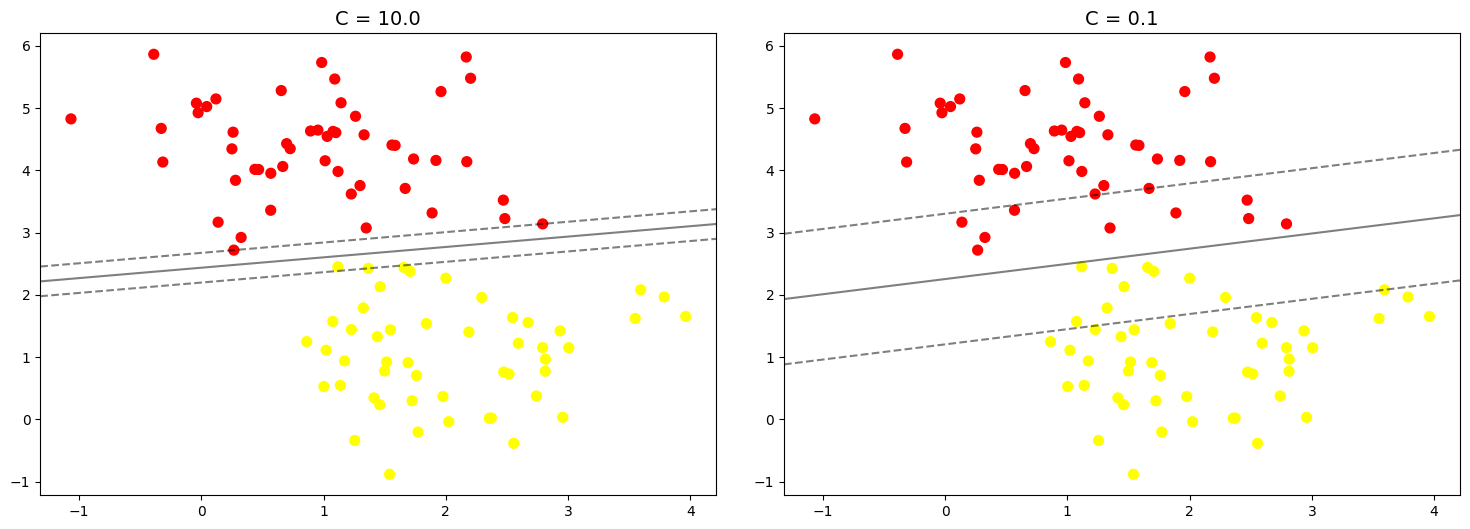

In [22]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)